In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt


# Get Start to Training Model fro the Research

In [4]:
data = pd.read_csv('../artifacts/sentiment_analysis.csv')

In [5]:
data.head()

,feedback,Label
0,Patta service ekak denneh. honda pirisidui meka,0
1,Servicenam patta.,0
2,Itha hondai servie mekanam.,0
3,Service eka itha hondai.,0
4,Servicenam intha hondai. Maru service ekak.,0


# Data Pre-Processing

In [6]:
data.shape


(2840, 2)

In [7]:
data.duplicated().sum()

np.int64(34)

In [8]:
data.isnull().sum()

feedback    0
Label       0
dtype: int64

# Text Preprocessing

In [9]:
import re
import string

In [10]:
data['feedback'].head(5)

0    Patta service ekak denneh. honda pirisidui meka
1                                  Servicenam patta.
2                        Itha hondai servie mekanam.
3                           Service eka itha hondai.
4        Servicenam intha hondai. Maru service ekak.
Name: feedback, dtype: object

# Convert Lower Case

In [11]:
data['feedback'] = data['feedback'].apply(lambda x: " " .join(x.lower() for x in x.split()))

In [12]:
data.head()

,feedback,Label
0,patta service ekak denneh. honda pirisidui meka,0
1,servicenam patta.,0
2,itha hondai servie mekanam.,0
3,service eka itha hondai.,0
4,servicenam intha hondai. maru service ekak.,0


# Remove Link

In [13]:
data['feedback'] = data['feedback'].apply(lambda x: " ".join(re.sub(r'^https?:\/\/.*[\r\n]*', '', x, flags=re.MULTILINE) for x in x.split()))

In [14]:
data.head()

,feedback,Label
0,patta service ekak denneh. honda pirisidui meka,0
1,servicenam patta.,0
2,itha hondai servie mekanam.,0
3,service eka itha hondai.,0
4,servicenam intha hondai. maru service ekak.,0


# Remove Puncuations Marks

In [15]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [16]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text
data["feedback"] = data["feedback"].apply(remove_punctuations)

In [17]:
data.head()

,feedback,Label
0,patta service ekak denneh honda pirisidui meka,0
1,servicenam patta,0
2,itha hondai servie mekanam,0
3,service eka itha hondai,0
4,servicenam intha hondai maru service ekak,0


# Numbers Remove

In [18]:
data['feedback'] = data["feedback"].str.replace(r'\d+', '', regex=True)

In [19]:
data

,feedback,Label
0,patta service ekak denneh honda pirisidui meka,0
1,servicenam patta,0
2,itha hondai servie mekanam,0
3,service eka itha hondai,0
4,servicenam intha hondai maru service ekak,0
...,...,...
2835,brendanbrady the new apple advert can fuck off...,1
2836,all i wanna do is put music from my itunes on ...,1
2837,fuckyou apple one thing stops working and i ha...,1
2838,second fucking time stay on hold for mins and...,1


# Remove stopwords

In [20]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [21]:
import nltk

In [22]:
with open('../static/model/stopwords/english', 'r') as file:
    sw = file.read().splitlines()

In [23]:
sw

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [24]:
 data["feedback"] = data["feedback"].apply(lambda x: " ".join(word for word in x.split() if word not in sw))

In [25]:
data.head()

,feedback,Label
0,patta service ekak denneh honda pirisidui meka,0
1,servicenam patta,0
2,itha hondai servie mekanam,0
3,service eka itha hondai,0
4,servicenam intha hondai maru service ekak,0


In [26]:
sw

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

# Stemming 


In [27]:
from nltk.stem import PorterStemmer


In [28]:
ps = PorterStemmer()

In [29]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [30]:
data['feedback'] = data["feedback"].apply(lambda x:" ".join(ps.stem(x)for x in x.split()))

In [31]:
ps  

<PorterStemmer>

# Building Vocabulary

In [32]:
from collections import Counter


In [33]:
vocab = Counter()

In [34]:
vocab.update(['java','python'])

In [35]:
vocab

Counter({'java': 1, 'python': 1})

In [36]:
for sentence in data['feedback']:
 print(sentence)

patta servic ekak denneh honda pirisidui meka
servicenam patta
itha hondai servi mekanam
servic eka itha hondai
servicenam intha hondai maru servic ekak
itha hondai servic meka
bu servic eka nam itha hondai pirisidui athul
itha hondai bu servic ekak
meh servic eka nam godak hondai
godak hondai meh bu servic ekanam
godak hondai servic ekapatta servic eka patta pirisidui
servic eka gena kiyanna oneh nam meka niyamai
godak honda servic ekak meh kattiya denneh
mechchara godak honda servic ekak dakala nah
godak hondama servic ekak mama dakapu pirisidui athul hondai
godak hondai servic eka dena kattiya
godak hondai lamai servic eka bu uth pirisidui patta
meka nam supiri servic ekak patta pirisidui supiri
servic ekanam supiri
supiri servic ekak machang
mama dakapu supiri servic ekak meka thrupthimath ekak patta pirisidui meka
supirima servic ekak meka
servic eka patta supiri athul pirisidui hondai
supiri bu servic ekak meka
servic eka supiri
servic eka gena kiyanna oneh nam meka hondai
supiri

In [37]:
for sentence in data['feedback']:
    vocab.update(sentence.split())

In [38]:
vocab

Counter({'iphon': 771,
         'nah': 655,
         'appl': 581,
         'servic': 545,
         'ekak': 370,
         'meka': 358,
         'eka': 315,
         'samsung': 275,
         'new': 214,
         'phone': 190,
         'one': 177,
         'follow': 166,
         'meh': 165,
         'hondai': 162,
         'patta': 157,
         'eth': 150,
         'soni': 148,
         'honda': 145,
         'meke': 142,
         '…': 140,
         'ganna': 136,
         'awul': 125,
         'anthimai': 110,
         'wadi': 109,
         'nam': 106,
         'thawa': 102,
         'chater': 102,
         'rt': 95,
         'ipad': 93,
         'mata': 92,
         'naginn': 91,
         'chora': 90,
         'jarawak': 89,
         'hariyann': 89,
         'love': 89,
         'day': 89,
         'like': 85,
         'deyak': 84,
         'app': 84,
         'get': 83,
         'mama': 79,
         'android': 79,
         'galaxi': 78,
         'bu': 77,
         'thrupthimath': 77,


In [39]:
len(vocab)

5618

In [40]:
data.shape

(2840, 2)

# Update token if vocab >10 all data store the  "token"

In [41]:
token = [key for key in vocab if vocab[key] > 10]

In [42]:
token

['patta',
 'servic',
 'ekak',
 'honda',
 'pirisidui',
 'meka',
 'itha',
 'hondai',
 'mekanam',
 'eka',
 'maru',
 'bu',
 'nam',
 'athul',
 'meh',
 'godak',
 'ekanam',
 'gena',
 'kiyanna',
 'niyamai',
 'kattiya',
 'dakala',
 'nah',
 'hondama',
 'mama',
 'dakapu',
 'dena',
 'supiri',
 'thrupthimath',
 'wage',
 'neh',
 'awlak',
 'widiyata',
 'thibba',
 'shape',
 'echchara',
 'bohoma',
 'ith',
 'kiyala',
 'puluwang',
 'ekata',
 'wenawa',
 'meke',
 'sira',
 'aththatama',
 'kisima',
 'ela',
 'thamai',
 'elakiri',
 'thada',
 'bro',
 'karima',
 'prashnayak',
 'nathi',
 'thibb',
 'apita',
 'hondata',
 'arakshithai',
 'yanakota',
 'mata',
 'pahasui',
 'suwapahasu',
 'eth',
 'diunu',
 'wenna',
 'one',
 'poddak',
 'thawa',
 'eke',
 'meta',
 'wada',
 'hadenna',
 'hodata',
 'hadala',
 'ganna',
 'tikak',
 'gaththanam',
 'wadi',
 'diyunu',
 'karanna',
 'senaga',
 'okkama',
 'seat',
 'driver',
 'book',
 'yaddi',
 'yana',
 'wenn',
 'much',
 'use',
 'hari',
 'smile',
 'hondatama',
 'realli',
 'appa',
 'de

In [43]:
len(vocab)

5618

In [44]:
len(token)

398

# Save vocabulary as a File

In [45]:
def save_vocabulary(lines,filename):
    data ='\n'.join(lines)
    file =open(filename,'w',encoding='utf=-8')
    file.write(data)
    file.close()
    
save_vocabulary(token,'../static/model/vocabulary.txt')

# Divide DataSet

In [46]:
data

,feedback,Label
0,patta servic ekak denneh honda pirisidui meka,0
1,servicenam patta,0
2,itha hondai servi mekanam,0
3,servic eka itha hondai,0
4,servicenam intha hondai maru servic ekak,0
...,...,...
2835,brendanbradi new appl advert fuck appl relat p...,1
2836,wanna put music itun iphon fuck difficult appl,1
2837,fuckyou appl one thing stop work buy whole new...,1
2838,second fuck time stay hold min phone start rin...,1


In [47]:
x = data['feedback']
y = data['Label']

In [48]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [49]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [50]:
x_train.shape

(2272,)

In [51]:
x_test.shape


(568,)

In [52]:
x_train


1886    koncno je prisel moj iii nazaj servisa happi c...
953                          patta chater eka mama dakapu
577     meh servic eka huththa set wenneh nah kadila t...
2110    appl pleas love god stop spam set appl pay don...
1407    oh dear joy new iphon good comment lip servic ...
                              ...                        
667                    patta chater servic eka aththatama
2745    gentl creativ digit art children univers green...
1960    bowbun final learn pretti cute highbun sweet i...
418                      meka nam supiri servic ekakpatta
1804    earli christma gift sweet husband galaxi galax...
Name: feedback, Length: 2272, dtype: object

In [53]:
y_test

1273    1
2576    0
1025    1
2774    1
235     0
       ..
2099    0
575     1
619     1
978     1
576     1
Name: Label, Length: 568, dtype: int64

# Vectorization


In [54]:
def vectorizer(ds, vocabulary):
    vectorized_lst = []
    
    for sentence in ds:
        sentence_lst = np.zeros(len(vocabulary))
        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_lst[i] = 1
        vectorized_lst.append (sentence_lst)
    vectorized_lst_new = np.asarray(vectorized_lst, dtype=np.float32)
    return vectorized_lst_new

In [55]:
vectorized_x_train = vectorizer(x_train,token)

In [56]:
vectorized_x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [57]:
for i in vectorized_x_train[0]:
    print(i)

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [58]:
vectorized_x_test = vectorizer(x_test,token)

In [59]:
y_test


1273    1
2576    0
1025    1
2774    1
235     0
       ..
2099    0
575     1
619     1
978     1
576     1
Name: Label, Length: 568, dtype: int64

In [60]:
y_train

1886    0
953     1
577     1
2110    1
1407    1
       ..
667     1
2745    0
1960    0
418     0
1804    0
Name: Label, Length: 2272, dtype: int64

In [61]:
y_train.value_counts()

Label
0    1283
1     989
Name: count, dtype: int64



### Get Pie chart

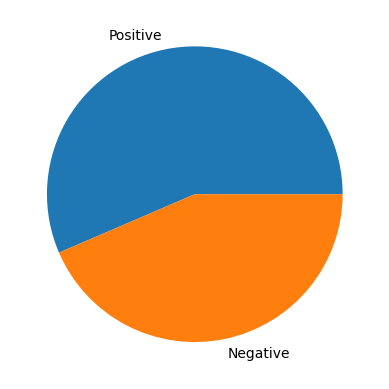

In [62]:
plt.pie(
    np.array([y_train.value_counts()[0], y_train.value_counts()[1]]), 
    labels=['Positive', 'Negative']
)
plt.show()

In [63]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [64]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
vectorized_x_train_somte, y_train_smote = smote.fit_resample(vectorized_x_train,y_train)
print(vectorized_x_train_somte.shape,y_train_smote.shape)

(2566, 398) (2566,)


In [65]:
y_train_smote.value_counts()

Label
0    1283
1    1283
Name: count, dtype: int64

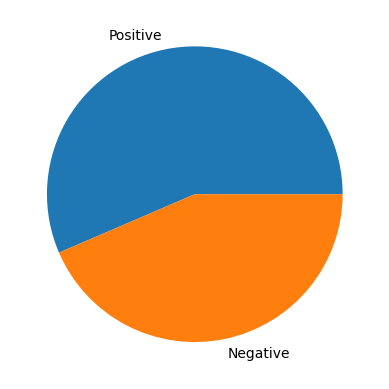

In [66]:
plt.pie(
    np.array([y_train.value_counts()[0], y_train.value_counts()[1]]), 
    labels=['Positive', 'Negative']
)
plt.show()

In [67]:
y_train_smote

0       0
1       1
2       1
3       1
4       1
       ..
2561    1
2562    1
2563    1
2564    1
2565    1
Name: Label, Length: 2566, dtype: int64

In [68]:
vectorized_x_train_somte

array([[0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [1.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 1.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       ...,
       [0.       , 0.       , 0.6057488, ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ]], dtype=float32)

In [69]:
vectorized_x_test

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [70]:
y_test


1273    1
2576    0
1025    1
2774    1
235     0
       ..
2099    0
575     1
619     1
978     1
576     1
Name: Label, Length: 568, dtype: int64

# Model Traing And Evaluation

### Import model for the Training model

In [71]:
from sklearn.linear_model import  LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [72]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def training_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Training Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')

def validation_scores(Y_act, Y_pred):
    acc = round(accuracy_score(Y_act, Y_pred), 3)
    pr = round(precision_score(Y_act, Y_pred), 3)
    rec = round(recall_score(Y_act, Y_pred), 3)
    f1 = round(f1_score(Y_act, Y_pred), 3)
    print(f'Validation Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')


### Logistc Regression

In [73]:
lr = LogisticRegression()
lr.fit(vectorized_x_train_somte,y_train_smote)


LogisticRegression()

In [74]:
y_train_pred = lr.predict(vectorized_x_train_somte)


In [75]:
 y_test_pred = lr.predict(vectorized_x_test)

In [76]:
training_scores(y_train_smote,y_train_pred)

Training Scores:
	Accuracy = 0.939
	Precision = 0.946
	Recall = 0.931
	F1-Score = 0.939


In [77]:
validation_scores(y_test, y_test_pred)

Validation Scores:
	Accuracy = 0.901
	Precision = 0.9
	Recall = 0.862
	F1-Score = 0.88


### Naive Bayes

In [78]:
mnb = MultinomialNB()
mnb.fit(vectorized_x_train_somte,y_train_smote)

y_train_pred = mnb.predict(vectorized_x_train_somte)
y_test_pred = mnb.predict(vectorized_x_test)

In [79]:
training_scores(y_train_smote,y_train_pred)
validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.876
	Precision = 0.895
	Recall = 0.853
	F1-Score = 0.873
Validation Scores:
	Accuracy = 0.861
	Precision = 0.848
	Recall = 0.816
	F1-Score = 0.832


### Decision Tree 

In [80]:
dt = DecisionTreeClassifier()
dt.fit(vectorized_x_train_somte,y_train_smote)

y_train_pred = dt.predict(vectorized_x_train_somte)
y_test_pred = dt.predict(vectorized_x_test)

In [81]:
training_scores(y_train_smote,y_train_pred)
validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.996
	Precision = 1.0
	Recall = 0.993
	F1-Score = 0.996
Validation Scores:
	Accuracy = 0.866
	Precision = 0.825
	Recall = 0.866
	F1-Score = 0.845


### Random Forest

In [82]:
rf = RandomForestClassifier()
rf.fit(vectorized_x_train_somte,y_train_smote)

y_train_pred = rf.predict(vectorized_x_train_somte)
y_test_pred = rf.predict(vectorized_x_test)

In [83]:
training_scores(y_train_smote,y_train_pred)
validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.996
	Precision = 1.0
	Recall = 0.993
	F1-Score = 0.996
Validation Scores:
	Accuracy = 0.889
	Precision = 0.873
	Recall = 0.862
	F1-Score = 0.867


In [84]:
svc = SVC()
svc.fit(vectorized_x_train_somte,y_train_smote)

y_train_pred = svc.predict(vectorized_x_train_somte)
y_test_pred = svc.predict(vectorized_x_test)

In [85]:
training_scores(y_train_smote,y_train_pred)
validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.966
	Precision = 0.97
	Recall = 0.961
	F1-Score = 0.966
Validation Scores:
	Accuracy = 0.907
	Precision = 0.915
	Recall = 0.858
	F1-Score = 0.886


### Save model as a file in the model folder

In [86]:
import pickle

In [87]:
with open('../static/model/model.pickle','wb') as file:
    pickle.dump(lr, file)

In [88]:
import joblib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
import os

# Example training data
texts = ["I love this!", "I hate it.", "This is amazing", "This is terrible"]
labels = [1, 0, 1, 0]  # 1 = positive, 0 = negative

# Train vectorizer and model
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(texts)
model = MultinomialNB()
model.fit(X, labels)

# Ensure directory exists
os.makedirs("static/model", exist_ok=True)

# Save model and vectorizer
joblib.dump(model, "static/model/model.pickle")
joblib.dump(vectorizer, "static/model/vectorizer.pkl")

print("Model and vectorizer saved successfully!")

Model and vectorizer saved successfully!


In [89]:
import numpy as np
import pandas as pd
import pickle
import re
import string
import pickle

In [90]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')

    return text

In [ ]:
with open('../static/model/stopwords/english', 'r') as file:
    sw = file.read().splitlines()

In [ ]:
vocab = pd.read_csv('../static/model/vocabulary.txt',header=None)
tokens = vocab[0].tolist()

In [ ]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()  
preprocessed_data = preprocessing(txt)

In [ ]:
def preprocessing(text):
    data = pd.DataFrame([text], columns=['feedback'])
    data['feedback'] = data['feedback'].apply(lambda x: " " .join(x.lower() for x in x.split()))
    data['feedback'] = data['feedback'].apply(lambda x: " ".join(re.sub(r'^https?:\/\/.*[\r\n]*', '', x, flags=re.MULTILINE) for x in x.split()))
    data["feedback"] = data["feedback"].apply(remove_punctuations)
    data['feedback'] = data["feedback"].str.replace(r'\d+', '', regex=True)
    data["feedback"] = data["feedback"].apply(lambda x: " ".join(word for word in x.split() if word not in sw))
    data['feedback'] = data["feedback"].apply(lambda x:" ".join(ps.stem(x)for x in x.split()))
    data['feedback'] = data["feedback"].apply(lambda x:" ".join(ps.stem(x)for x in x.split()))
    return data["feedback"]

In [ ]:
preprocessed_data = preprocessing(txt)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

def vectorizer(ds, vocabulary):
    vectorizer = TfidfVectorizer(vocabulary=vocabulary)
    vectorized_lst = vectorizer.fit_transform(ds).toarray()
    return vectorized_lst.astype(np.float32)

In [ ]:
def get_prediction(vectorized_text):
    prediction = model.predict(vectorized_text)  # This returns an array
    predicted_label = prediction[0]  # Extract first element if it's a single prediction
    labels = {1: "negative", 0: "positive", -1: "neutral"}  # Modify based on your model
    return labels.get(predicted_label, "unknown")  # Lookup in dictionary

In [ ]:
txt = "narakai"  # Define your input text

print(get_prediction)  # Print the result

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import joblib

# Sample training data
texts = ["I love this!", "This is bad.", "Amazing experience.", "Not good at all."]
labels = [1, 0, 1, 0]  # 1 = Positive, 0 = Negative

# Create and train the vectorizer
vectorizer = TfidfVectorizer()
vectorizer.fit(texts)

# Save the vectorizer
joblib.dump(vectorizer, "static/model/vectorizer.pkl")

print("Vectorizer saved successfully!")

In [ ]:
import joblib

try:
    vectorizer = joblib.load("static/model/vectorizer.pkl")
    print("Vectorizer loaded successfully:", type(vectorizer))
except Exception as e:
    print("Error loading vectorizer:", e)
    

In [ ]:
import joblib

# Load the vectorizer without executing `app.py`
vectorizer = joblib.load("static/model/vectorizer.pkl")

# Save it again to remove unnecessary dependencies
joblib.dump(vectorizer, "static/model/vectorizer_fixed.pkl")

print("Vectorizer file saved successfully!")


In [ ]:
pip install Flask joblib scikit-learn


In [ ]:
pip show joblib scikit-learn


In [ ]:
import joblib
# Save trained model
# Save vectorizer
joblib.dump(vectorizer, "static/model/vectorizer.pkl")

In [ ]:
import joblib

# Save vectorizer
joblib.dump(vectorizer, "static/model/vectorizer.pkl")


In [ ]:
with open('../static/model/vectorizerr.pickle','wb') as file:
    pickle.dump(lr, file)

In [ ]:
import joblib
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a sample vectorizer
vectorizer = TfidfVectorizer()
sample_texts = ["I love this!", "This is terrible."]  # Example texts
vectorizer.fit(sample_texts)

# Save it again
joblib.dump(vectorizer, "static/model/vectorizer.pickle")

print("Vectorizer saved successfully!")

In [ ]:
import os
import joblib

vectorizer_path = "/Users/tishanrashmika/Desktop/Research /research/research/sentimentAnalysis_Project/static/model/vectorizer.pickle"

# Check if the file exists
if os.path.exists(vectorizer_path):
    print("Vectorizer file found! Loading...")
    vectorizer = joblib.load(vectorizer_path)
    print("Vectorizer loaded successfully!")
else:
    print("Error: Vectorizer file is missing!")

In [ ]:
import joblib

# Assuming you have the trained vectorizer
vectorizer = "Your trained vectorizer"

# Save it again
joblib.dump(vectorizer, "/Users/tishanrashmika/Desktop/Research /research/research/sentimentAnalysis_Project/static/model/vectorizer.pickle")
print("Vectorizer saved successfully!")

In [ ]:
import joblib
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a sample vectorizer (Use the one you trained with your dataset)
vectorizer = TfidfVectorizer()

# Save the vectorizer correctly
vectorizer_path = "static/model/vectorizer.pickle"
joblib.dump(vectorizer, vectorizer_path)

print("✅ Vectorizer saved successfully!")


In [ ]:
import joblib
from sklearn.feature_extraction.text import TfidfVectorizer

# ✅ Sample dataset (replace with your real training data)
texts = ["I love this!", "I hate this!", "This is amazing!", "This is terrible!"]
labels = [1, 0, 1, 0]  # 1 = Positive, 0 = Negative

# ✅ Train the vectorizer
vectorizer = TfidfVectorizer()
vectorizer.fit(texts)  # Fit the vectorizer on your dataset

# ✅ Save the trained vectorizer
joblib.dump(vectorizer, "static/model/vectorizer.pickle")
print("✅ Vectorizer retrained and saved!")